<a href="https://colab.research.google.com/github/ilikemichael/ml1216/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.fashion_mnist import load_data
# ((訓練圖片 訓練答案), (測試圖片 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:

labels = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Boot"      
]

In [4]:
import pandas as pd
print(labels[y_train[5]])
pd.DataFrame(x_train[5])

Pullover


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,1,0,0,0,0,22,88,188,172,132,125,141,199,143,9,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,20,131,199,206,196,202,242,255,255,250,222,197,206,188,126,17,0,0,0,0,0,0
2,0,0,0,1,0,35,214,191,183,178,175,168,150,162,159,152,158,179,183,189,195,185,82,0,0,0,0,0
3,0,0,0,0,0,170,190,172,177,176,171,169,162,155,148,154,169,174,175,175,177,183,188,12,0,0,0,0
4,0,0,0,0,25,194,180,178,174,184,187,189,187,184,181,189,200,197,193,190,178,175,194,90,0,0,0,0
5,0,0,0,0,42,218,191,197,208,204,211,209,210,212,211,214,215,213,214,211,211,191,200,158,0,0,0,0
6,0,0,0,0,88,221,215,217,219,211,185,150,118,107,99,88,83,90,135,212,203,207,219,169,0,0,0,0
7,0,0,0,0,0,27,118,162,40,0,0,0,10,19,28,39,47,36,0,0,203,230,220,203,0,0,0,0
8,0,0,0,0,138,136,71,69,54,216,217,203,184,168,163,162,163,178,221,186,38,26,7,0,0,0,0,0
9,0,0,0,0,67,134,154,224,129,66,81,117,129,128,132,137,131,129,86,73,157,151,134,216,18,0,0,0


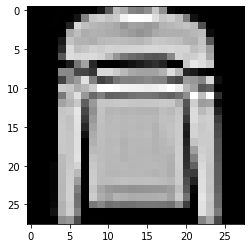

In [5]:
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
import matplotlib.pyplot as plt
plt.imshow(x_train[5], cmap="gray")

In [6]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
layers = [
    # 784 * 128 + 128(bias)
    Dense(256, activation="relu", input_dim=784),
    # 128 * 10 + 10(bias)
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 輸出一個: binary crossentropy
# 輸出多個: categorical crossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
model.compile(loss=CategoricalCrossentropy(),
       optimizer="adam",
       metrics=["accuracy"])

In [8]:

# 預處理
# x: 1.reshape 2.scaling
# y: one-hot
from tensorflow.keras.utils import to_categorical
x_train_r = x_train.reshape(-1, 784) / 255
x_test_r = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)
print(x_train_r.shape)
print(y_train_cat[0])
print(y_train[0])

(60000, 784)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("mlp.h5", save_best_only=True)
]
# validation_split: 切出一部分資料驗證
# batch_size: 看多少筆才做一次調整(梯度下降)
# epochs: 訓練次數(60000-6000筆/epoch)
# 1 epoch 多少次梯度下降: 54000 / 200 -> 270
# verbose: 印出多少log(1:default 0:quiet 2:)
model.fit(x_train_r, 
     y_train_cat,
     validation_split=0.1,
     batch_size=200,
     epochs=50,
     verbose=2,
     callbacks=callbacks)

Epoch 1/50
270/270 - 2s - loss: 0.5727 - accuracy: 0.8024 - val_loss: 0.4541 - val_accuracy: 0.8387
Epoch 2/50
270/270 - 1s - loss: 0.4111 - accuracy: 0.8557 - val_loss: 0.3888 - val_accuracy: 0.8617
Epoch 3/50
270/270 - 1s - loss: 0.3680 - accuracy: 0.8711 - val_loss: 0.3630 - val_accuracy: 0.8727
Epoch 4/50
270/270 - 1s - loss: 0.3399 - accuracy: 0.8780 - val_loss: 0.3612 - val_accuracy: 0.8667
Epoch 5/50
270/270 - 1s - loss: 0.3171 - accuracy: 0.8867 - val_loss: 0.3607 - val_accuracy: 0.8745
Epoch 6/50
270/270 - 1s - loss: 0.2991 - accuracy: 0.8922 - val_loss: 0.3300 - val_accuracy: 0.8818
Epoch 7/50
270/270 - 1s - loss: 0.2885 - accuracy: 0.8963 - val_loss: 0.3363 - val_accuracy: 0.8787
Epoch 8/50
270/270 - 1s - loss: 0.2774 - accuracy: 0.8997 - val_loss: 0.3269 - val_accuracy: 0.8823
Epoch 9/50
270/270 - 1s - loss: 0.2621 - accuracy: 0.9048 - val_loss: 0.3286 - val_accuracy: 0.8833
Epoch 10/50
270/270 - 1s - loss: 0.2524 - accuracy: 0.9076 - val_loss: 0.3080 - val_accuracy: 0.8872

In [10]:
model.evaluate(x_test_r, y_test_cat)

313/313 [==============================] - 1s 1ms/step - loss: 0.3279 - accuracy: 0.8849


[0.327883780002594, 0.8848999738693237]

In [11]:
# sklearn: predict_proba/predict
# keras: predict/predict_classes
from sklearn.metrics import confusion_matrix
pre = model.predict_classes(x_test_r)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{}(真實)".format(labels[i]) for i in range(10)],
       columns=["{}(預測)".format(labels[i]) for i in range(10)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,T-shirt(預測),Trouser(預測),Pullover(預測),Dress(預測),Coat(預測),Sandal(預測),Shirt(預測),Sneaker(預測),Bag(預測),Boot(預測)
T-shirt(真實),889,0,10,30,4,1,62,0,4,0
Trouser(真實),3,970,1,20,4,0,1,0,1,0
Pullover(真實),21,0,807,13,94,0,65,0,0,0
Dress(真實),31,5,9,900,28,0,24,0,3,0
Coat(真實),1,1,95,32,811,0,60,0,0,0
Sandal(真實),0,0,0,0,0,960,0,22,2,16
Shirt(真實),170,0,81,33,72,1,639,0,4,0
Sneaker(真實),0,0,0,0,0,15,0,953,0,32
Bag(真實),11,0,9,3,6,2,6,5,958,0
Boot(真實),0,0,0,0,0,8,1,29,0,962


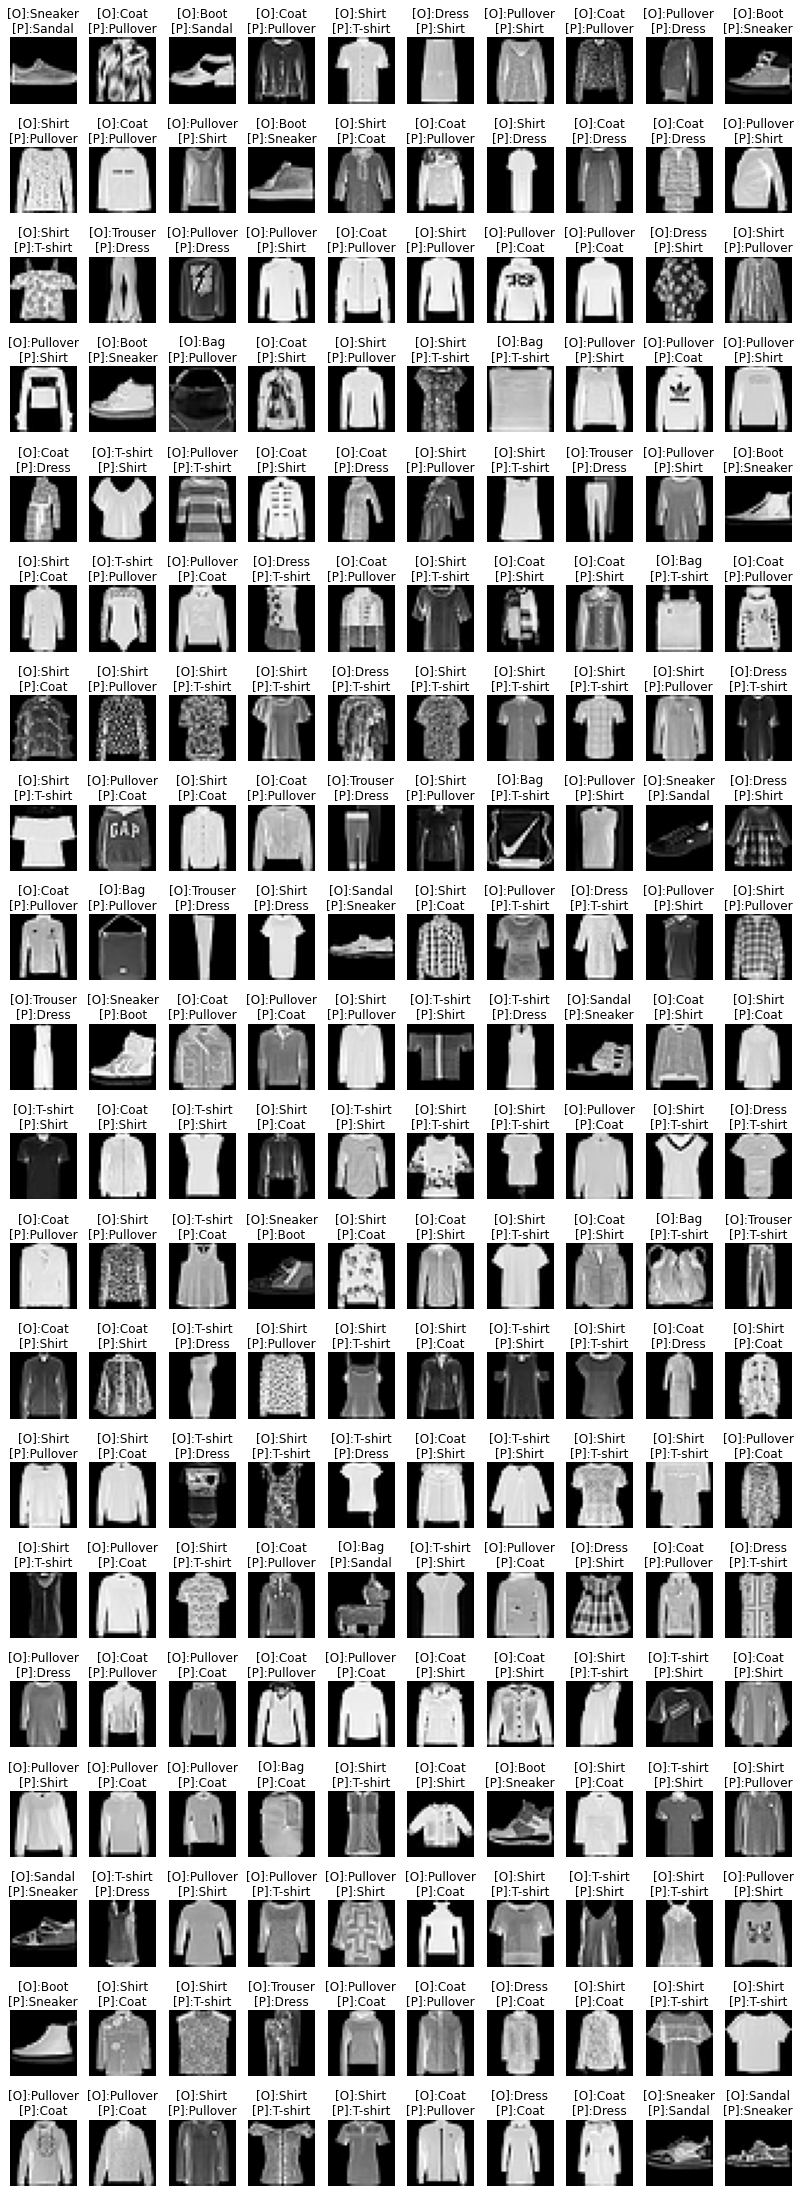

In [12]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
false_pre = pre[idx]
false_ori = y_test[idx]
false_img = x_test[idx]

plt.figure(figsize=(14, 42))
width = 10
height = len(idx) // width + 1
for i in range(len(idx)):
    plt.subplot(height, width, i+1)
    t = "[O]:{}\n[P]:{}".format(labels[false_ori[i]], labels[false_pre[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i], cmap="gray")

url:https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTbElg9ZJxisEC938F1gBCwaEP6_Vau61_E_w&usqp=CAU
T-shirt 的機率: 0.0
Trouser 的機率: 0.0
Pullover 的機率: 0.0
Dress 的機率: 0.0
Coat 的機率: 0.0
Sandal 的機率: 0.0
Shirt 的機率: 0.0
Sneaker 的機率: 0.0
Bag 的機率: 1.0
Boot 的機率: 0.0
答案: Bag


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


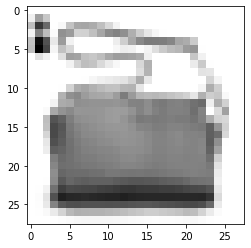

In [18]:
# PIL(pillow)
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
import requests
url = input("url:")
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36"
}
response = requests.get(url, stream=True, verify=False, headers=headers)

img = Image.open(response.raw).resize((28, 28)).convert("L")
img = np.array(img)
img_r = img.reshape(1, 784) / 255
proba = model.predict(img_r)[0]
for i in range(10):
    print(labels[i], "的機率:", round(proba[i], 3))
ans = model.predict_classes(img_r)[0]
print("答案:", labels[ans])
plt.imshow(img, cmap="gray")